# Define the agents

In [5]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import ListedColormap


In [6]:
# Import functions in the function file

%run trade_functions.ipynb


## define encounter matrix

In [7]:
economy_size1=10
economy_size2=20

In [8]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix1 = np.ones((economy_size1, economy_size1))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix1, 0)
# Create a 100x100 matrix filled with 1s
matrix2 = np.ones((economy_size2, economy_size2))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix2, 0)

# Defne  inhomogeneous economy

In [9]:


def intra_tradecd1(agent1,agent2,length,size,t,f1,f2):
  
  mla=agent1['money'].copy()
  gala=agent1['gooda'].copy()
  gbla=agent1['goodb'].copy()
  parametera=agent1['parameter'].copy()
  mlb=agent2['money'].copy()
  galb=agent2['gooda'].copy()
  gblb=agent2['goodb'].copy()
  parameterb=agent2['parameter'].copy()
  sum_etaa = sum(sublist[2] for sublist in parametera)
  sum_etab= sum(sublist[2] for sublist in parameterb)
  
  Ma_history=[]
  Mb_history=[]
  Ga_history=[]
  Gb_history=[]
  
  for i in range(length[0]):
    
    galn,gbln,mln=intra_trade(gala,gbla,mla,parametera,matrix1,1,f1,f2)
    gala=galn.copy()
    gbla=gbln.copy()
    mla=mln.copy()
    
    galn,gbln,mln=intra_trade(galb,gblb,mlb,parameterb,matrix2,1,f1,f2)
    galb=galn.copy()
    gblb=gbln.copy()
    mlb=mln.copy()
    Ga_history.append(sum(gala))
    Gb_history.append(sum(galb)) 
    Ma_history.append(sum(mla))
    Mb_history.append(sum(mlb))
    
  for j in range(length[1]):
    
    galn,gbln,mln=intra_trade(gala,gbla,mla,parametera,matrix1,1,f1,f2)
    gala=galn.copy()
    gbla=gbln.copy()
    mla=mln.copy()
    
    galn,gbln,mln=intra_trade(galb,gblb,mlb,parameterb,matrix2,1,f1,f2)
    galb=galn.copy()
    gblb=gbln.copy()
    mlb=mln.copy()
    
    gal1n,gbl1n,ml1n,gal2n,gbl2n,ml2n=inter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix1,size,t,f1,f2)
    gala=gal1n.copy()
    gbla=gbl1n.copy()
    mla=ml1n.copy()
    galb=gal2n.copy()
    gblb=gbl2n.copy()
    mlb=ml2n.copy()
      
    Ga_history.append(sum(gala))
    Gb_history.append(sum(galb)) 
    Ma_history.append(sum(mla))
    Mb_history.append(sum(mlb))
      

  return Ga_history,Ma_history,Gb_history,Mb_history








In [10]:
def get_agent(m1s,g1s):
    agent_a = create_agent()
    agent_a['id_list'] = [i for i in range(economy_size1)]
    agent_a['parameter']=[[1,1,2.5] for _ in range(economy_size1)]
    agent_a['money']=[m1s/economy_size1 for _ in range(economy_size1)]
    agent_a['gooda']=[g1s/economy_size1 for _ in range(economy_size1)]
    agent_a['goodb']=[1 for _ in range(economy_size1)]
    agent_b = create_agent()
    agent_b['id_list'] = [i for i in range(economy_size2)]
    agent_b['parameter']=[[1,1,1.5] for _ in range(economy_size2)]
    agent_b['money']=[(1-m1s)/economy_size2 for _ in range(economy_size2)]
    agent_b['gooda']=[(30-g1s)/economy_size2 for _ in range(economy_size2)]
    agent_b['goodb']=[1 for _ in range(economy_size2)]
    return agent_a, agent_b

# Plot functions


In [11]:


def calculate_averages(lst, chunk_size):
    averages = []
    for i in range(0, len(lst)):
        if i < chunk_size:
            chunk = lst[0:i+1]  # Average the first 0 to i items
        else:
            chunk = lst[i - chunk_size + 1:i+1]  # Average i-chunk_size to i items

        averages.append(sum(chunk) / len(chunk))

    return averages

In [12]:


# Create a colormap using 'YlOrBu' (Yellow-Orange-Blue) colormap
cmap = plt.get_cmap('YlOrBr', 9)  # You can adjust the number of colors as needed

# Extract the RGB values from the colormap
warm_colors = [cmap(i) for i in reversed(range(9))]

# Create a custom colormap with modified colors
custom_cmap = ListedColormap(warm_colors)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1540\173929855.py:11: RuntimeWarning: divide by zero encountered in log
  equation_values[i, j] = 10 * np.log(g1 * m1**2.5) + 20 * np.log((30 - g1) * (1 - m1)**1.5)


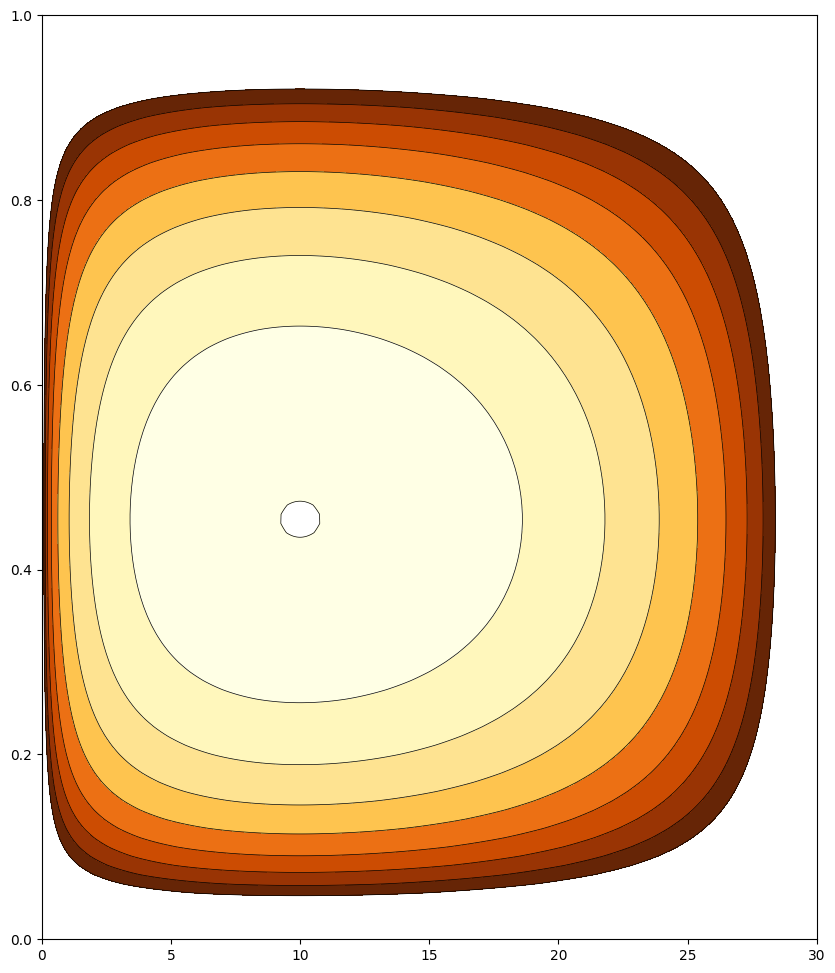

In [13]:



# Define the range of m1 and g1 values
m1_values = np.arange(0, 1.01, 0.01)  # Range from 0 to 1 with step size 0.01
g1_values = np.arange(0, 30.01, 0.01)  # Range from 0 to 30 with step size 0.01

# Create empty arrays to store the equation values
equation_values = np.empty((len(m1_values), len(g1_values)))

# Calculate the equation values for all combinations of m1 and g1
for i, m1 in enumerate(m1_values):
    for j, g1 in enumerate(g1_values):
        equation_values[i, j] = 10 * np.log(g1 * m1**2.5) + 20 * np.log((30 - g1) * (1 - m1)**1.5)

# Define the threshold values for the condition
thresholds = [5, 10, 15, 20, 25, 30, 35, 40, 45]

# Create a custom colormap with different colors using a specified Python colormap


# Create a contour plot with the custom colormap
plt.figure(figsize=(10, 12))
contour = plt.contourf(g1_values, m1_values, equation_values, levels=thresholds, cmap=custom_cmap)
contour_lines = plt.contour(g1_values, m1_values, equation_values, levels=thresholds, linewidths=0.5, colors='black')


In [14]:
def filter_mg_lists(g_list, m_list):
    filtered_m = []
    filtered_g = []
    
    for m, g in zip(m_list, g_list):
        if 0.01 <= m <= 0.99 and 0.5 <= g <= 29.5:
            filtered_m.append(m)
            filtered_g.append(g)
    
    return filtered_g, filtered_m



In [15]:

def get_path(m1s,g1s):
    agent_a,agent_b=get_agent(m1s,g1s)
    
    # Initialize lists to store the results
    tm_values = []
    tg_values = []
    
    
    for i in range(1, 6):  # Iterate 5 times
        g1, m1, g2, m2 = intra_tradecd1(agent_a,agent_b,[1,10000],1,[1,0,1],utility_func_cd,utility_func_cd)
    
    
        # Calculate time averages for m1 and g1
        tm = calculate_averages(m1, 1000)
        tg = calculate_averages(g1, 1000)
    
        # Append the results to the lists
        tm_values.append(tm)
        tg_values.append(tg)
    
    
    
    # Now, tm_values and tg_values contain tm1, tg1, tm2, tg2, tm3, tg3, tm4, tg4, tm5, tg5
    tm1, tg1, tm2, tg2, tm3, tg3, tm4, tg4, tm5, tg5 = tm_values[0], tg_values[0], tm_values[1], tg_values[1], tm_values[2], tg_values[2], tm_values[3], tg_values[3], tm_values[4], tg_values[4]
    return tm_values, tg_values

In [16]:
def plot_entropy(m1s,g1s):
    tm_values,tg_values=get_path(m1s,g1s)
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    
    # Create a figure and axis
    plt.figure(figsize=(12, 10))
    plt.xlabel('G')
    plt.ylabel('M')
    
    
    
    # Add labels for 'Initial Condition' and 'Max Entropy Point' at specific coordinates
    plt.text(g1s, m1s, '        Initial Condition', fontsize=12, color='black', ha='left', va='center')
    plt.text(10.0, 0.455, '       Maximum Entropy Point', fontsize=12, color='black', ha='left', va='center')
    
    # Define G range
    # Define the constants
    const1 = (m1s**2.5) * (g1s**1)
    const2 = ((1-m1s)**1.5) * ((30-g1s)**1)
    
    # Define the range for M and G
    G1 = np.linspace(0.1, 29.9, 500)
    G2 = np.linspace(0.1, 29.9, 500)
    Gp = np.linspace(0.1, 29.9, 100)
    
    # Calculate M value
    Mp = 5 * Gp / (90 + 2 * Gp)
    # Calculate M for the first equation
    M1 = (const1 / (G1**1))**(2/5)
    
    # Calculate M for the second equation
    M2 = 1 - ((const2 / ((30 - G2)**1)) ** (2/3))
    
    G1,M1=filter_mg_lists(G1,M1)
    G2,M2=filter_mg_lists(G2,M2)
    
    Gp,Mp=filter_mg_lists(Gp,Mp)
    plt.plot(G1, M1, label='Isentropic Curve for Economy A')
    plt.plot(G2, M2, label='Isentropic Curve for Economy B')
    # Calculate M for the second equation
    
    plt.plot(Gp, Mp, label='Pareto frontier of equal prices')
    
    
    for i in range(5):
        plt.plot(tg_values[i], tm_values[i], color=colors[i], label=f'Sample Path {i+1}')
    
    # Add a legend to the plot
    plt.legend()
    
    contour = plt.contourf(g1_values, m1_values, equation_values, levels=thresholds, cmap=custom_cmap)
    contour_lines = plt.contour(g1_values, m1_values, equation_values, levels=thresholds, linewidths=0.5, colors='black')
    
    # Add a colorbar with labeled thresholds
    cbar = plt.colorbar(contour)
    
    cbar.set_ticks(thresholds)
    cbar.set_ticklabels([str(val) for val in thresholds])
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('S', rotation=360)
    plt.xlim(0, 30)
    plt.ylim(0, 1)
    # Show the plot
    plt.grid()
    plt.show()

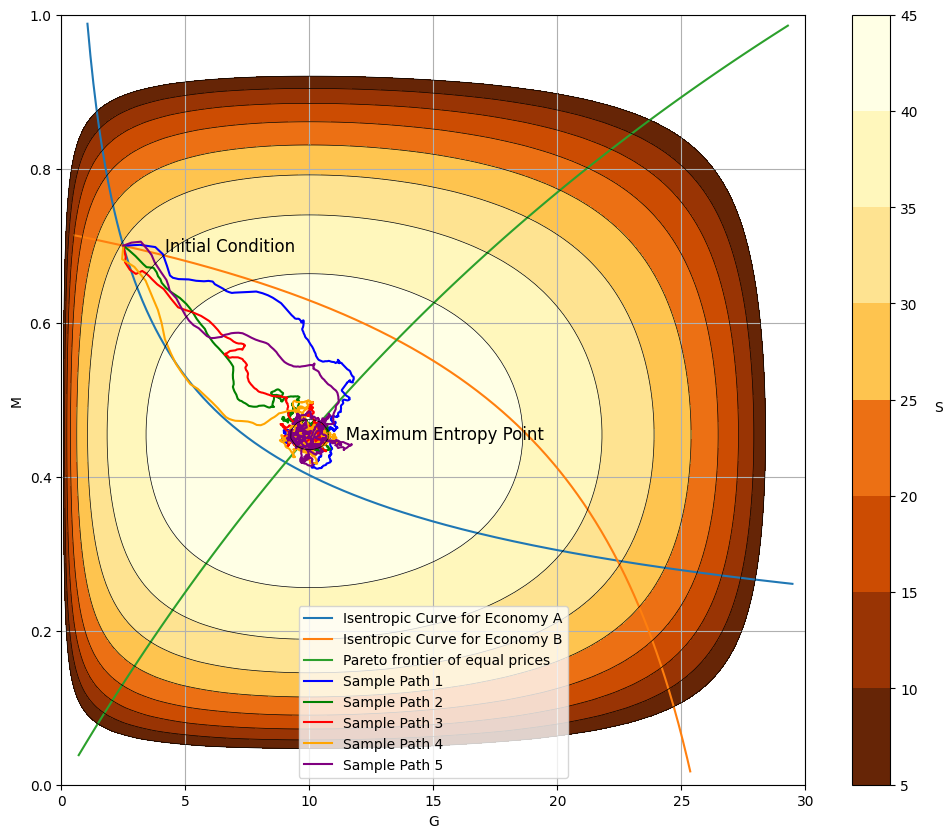

In [17]:
plot_entropy(0.7,2.5)

## plot2

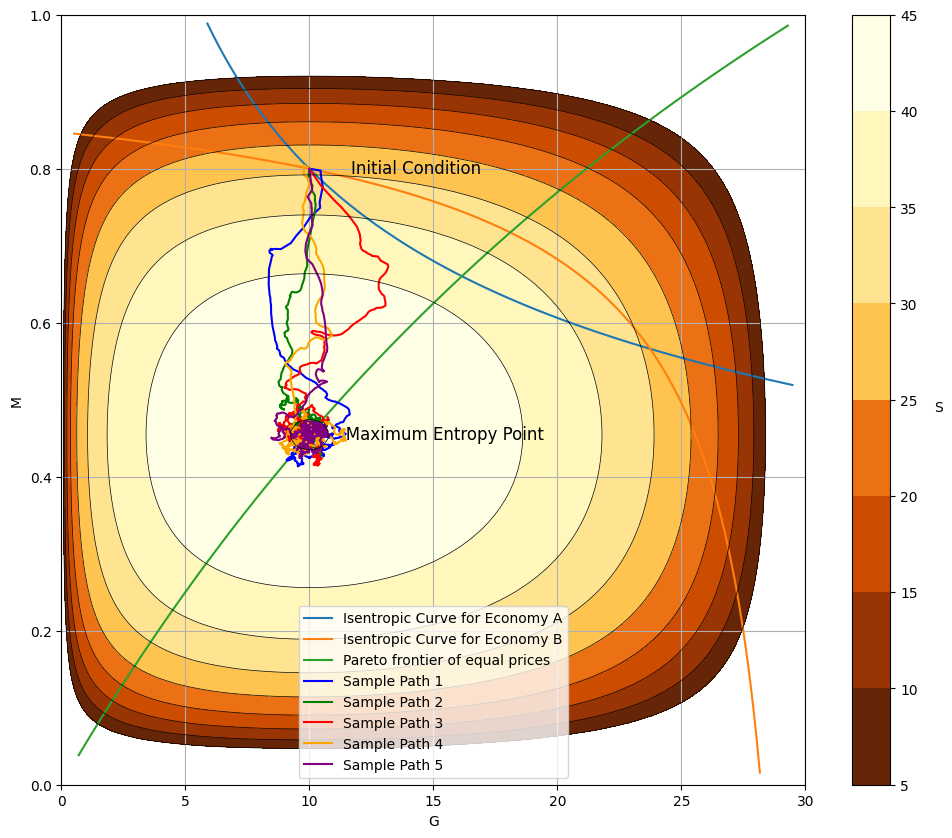

In [18]:
plot_entropy(0.8,10)